In [2]:
import pandas as pd
import os

In [ ]:
#Merge 12 months data inro single data frame

In [3]:

df= pd.read_csv(r'C:\Users\praja\Documents\Sales data\Sales_January_2019.csv')


In [5]:
all_months_data = pd.DataFrame()

for file in os.listdir(r'C:\Users\praja\Documents\Sales data'):
    if file.endswith(".csv"):
        df= pd.read_csv(file)
        all_months_data = pd.concat([all_months_data,df])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
0,4.0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2
1,4.0,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1
2,4.0,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1
3,4.0,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1
4,4.0,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1


In [7]:
#cleanup the data
#.remove the NAN values
nan_df= all_months_data[all_months_data.isna().any(axis=1)]
nan_df.head()

all_months_data.dropna(how='all')

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
0,4.0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2
1,4.0,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1
2,4.0,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1
3,4.0,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1
4,4.0,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1
5,4.0,04/29/19 13:03,176562,11.95,USB-C Charging Cable,"381 Wilson St, San Francisco, CA 94016",1
6,4.0,04/02/19 07:46,176563,99.99,Bose SoundSport Headphones,"668 Center St, Seattle, WA 98101",1
7,4.0,04/12/19 10:58,176564,11.95,USB-C Charging Cable,"790 Ridge St, Atlanta, GA 30301",1
8,4.0,04/24/19 10:38,176565,1700,Macbook Pro Laptop,"915 Willow St, San Francisco, CA 94016",1
9,4.0,04/08/19 14:05,176566,11.99,Wired Headphones,"83 7th St, Boston, MA 02215",1


In [8]:
all_months_data.dropna(inplace =True)


In [9]:
#Insert additional months
#1. Month column

all_months_data['Month'] = all_months_data['Order Date'].str[0:2]
all_months_data.head()


,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
0,04,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2
1,04,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1
2,04,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1
3,04,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1
4,04,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1


In [10]:
#convert Month column to int
# all_months_data['Month']=all_months_data['Month'].astype('int32') This results in error as heades from all csv are copied
#so need to remove the 'or' from dataframe

all_months_data =all_months_data[all_months_data['Month'].str[0:2]!='Or']
all_months_data.head()


,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered
0,04,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2
1,04,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1
2,04,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1
3,04,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1
4,04,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1


In [11]:
#export all data to csv
all_months_data.to_csv('all_data.csv', index=False)


In [12]:
#month column datatype chnaged to int
all_months_data['Month']=all_months_data['Month'].astype('int32') 

In [13]:
#2. add sales columns
#Quantity Ordered - convert to int
#Price Each - convert to int
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each'] =pd.to_numeric(all_months_data['Price Each'])


In [14]:
#to add sales colums. sales= Quantity Ordered *Price Each
all_months_data ['sales']=all_months_data['Quantity Ordered']*all_months_data['Price Each']
all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales
0,4,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90
1,4,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99
2,4,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00
3,4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99
4,4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99


In [15]:
#what was the bsest month for sales? How much was earned that month?

results = all_months_data.groupby('Month').sum()


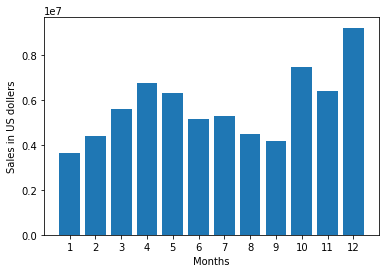

In [65]:
import matplotlib.pyplot as plt
months =range(1,13)

plt.bar(months,results['sales'])
plt.xticks(months)
plt.ylabel('Sales in US dollers')
plt.xlabel('Months')
plt.show()


In [17]:
# What city sold the most product?

#1. create a column city 
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_months_data['City'] =all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})")
all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales,City
0,4,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90,Dallas(TX)
1,4,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99,Boston(MA)
2,4,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00,Los Angeles(CA)
3,4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA)
4,4,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA)


In [18]:
city_Sales = all_months_data.groupby('City').sum()
city_Sales.sort_values(by='sales', ascending=False)

,Month,Price Each,Quantity Ordered,sales
City,,,,
San Francisco(CA),631040,1.642292e+07,100478,1.652441e+07
Los Angeles(CA),416650,1.084287e+07,66578,1.090514e+07
New York City(NY),351482,9.270742e+06,55864,9.328635e+06
Boston(MA),282224,7.274820e+06,45056,7.323284e+06
Atlanta(GA),209588,5.559816e+06,33204,5.590997e+06
Dallas(TX),209240,5.505256e+06,33460,5.535951e+06
Seattle(WA),209882,5.466592e+06,33106,5.495511e+06
Portland(OR),141242,3.721116e+06,22606,3.741465e+06
Austin(TX),139658,3.619747e+06,22306,3.639164e+06


In [50]:
# What time should we display advertisemens to maximize the likelihood of customer’s buying product?

all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

In [52]:
all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales,City
0,4,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90,Dallas(TX)
1,4,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99,Boston(MA)
2,4,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00,Los Angeles(CA)
3,4,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA)
4,4,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA)


In [55]:
# create new column 'hour' from the order date
all_months_data['hour']= all_months_data['Order Date'].dt.hour


all_months_data.head()

,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,sales,City,hour
0,4,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,23.90,Dallas(TX),8
1,4,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,99.99,Boston(MA),22
2,4,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,600.00,Los Angeles(CA),14
3,4,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),14
4,4,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1,11.99,Los Angeles(CA),9


In [58]:
all_months_data.groupby(['hour']).count()['Order ID']  # this gives number of orders placed each hour of the date

hour
0      7820
1      4700
2      2486
3      1662
4      1708
5      2642
6      4964
7      8022
8     12512
9     17496
10    21888
11    24822
12    25174
13    24258
14    21968
15    20350
16    20768
17    21798
18    24560
19    25810
20    24456
21    21842
22    17644
23    12550
Name: Order ID, dtype: int64

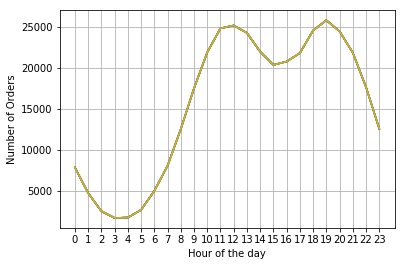

In [67]:
# preset the data into graphical way

hours = [hour for hour , df in all_months_data.groupby('hour')]
plt.plot(hours, all_months_data.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour of the day')
plt.ylabel('Number of Orders')
plt.show()

In [76]:
#4. - What products are most often sold together?

all_months_data.groupby(['Product'])

Product
20in Monitor                   8202
27in 4K Gaming Monitor        12460
27in FHD Monitor              15014
34in Ultrawide Monitor        12362
AA Batteries (4-pack)         41154
AAA Batteries (4-pack)        41282
Apple Airpods Headphones      31098
Bose SoundSport Headphones    26650
Flatscreen TV                  9600
Google Phone                  11050
LG Dryer                       1292
LG Washing Machine             1332
Lightning Charging Cable      43316
Macbook Pro Laptop             9448
ThinkPad Laptop                8256
USB-C Charging Cable          43806
Vareebadd Phone                4130
Wired Headphones              37764
iPhone                        13684
Name: Order ID, dtype: int64